In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Base.csv', sep=";")

In [3]:
df.head()

,ID,SAFRA,CEP,IDADE,GENERO,RENDA,SCORE_F1,SCORE_F2,IND_BOM
0,1,201907,92010190,37,M,40000.0,528.0,719.0,1
1,2,201909,65090650,36,M,19500.0,454.0,717.0,1
2,3,201908,13482783,43,F,1200.0,756.0,827.0,1
3,4,201905,60541704,35,M,1280.0,2.0,607.0,0
4,5,201906,69086129,27,M,7058.0,517.0,738.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 9 columns):
ID          6187 non-null int64
SAFRA       6187 non-null int64
CEP         6187 non-null int64
IDADE       6187 non-null int64
GENERO      6162 non-null object
RENDA       6187 non-null float64
SCORE_F1    6184 non-null float64
SCORE_F2    6185 non-null float64
IND_BOM     6187 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 435.1+ KB


In [5]:
df["CEP"] = df["CEP"].astype('category')

In [6]:
df.isnull().sum().sum()

30

In [7]:
df.shape

(6187, 9)

In [8]:
df.describe()

,ID,SAFRA,IDADE,RENDA,SCORE_F1,SCORE_F2,IND_BOM
count,6187.000000,6187.000000,6187.000000,6187.000000,6184.000000,6185.000000,6187.000000
mean,3094.000000,201907.226281,36.730726,4534.006455,592.244502,681.563298,0.717472
std,1786.177389,1.322369,16.259660,4126.257507,191.671301,82.583387,0.450265
min,1.000000,201905.000000,12.000000,998.000000,2.000000,411.000000,0.000000
25%,1547.500000,201906.000000,28.000000,2200.000000,473.000000,626.000000,0.000000
50%,3094.000000,201907.000000,35.000000,3300.000000,608.000000,681.000000,1.000000
75%,4640.500000,201908.000000,43.000000,5000.000000,739.000000,740.000000,1.000000
max,6187.000000,201909.000000,999.000000,60000.000000,984.000000,939.000000,1.000000


In [9]:
df.loc[df['IDADE'] == 999]

,ID,SAFRA,CEP,IDADE,GENERO,RENDA,SCORE_F1,SCORE_F2,IND_BOM
755,756,201909,87050440,999,F,4000.0,608.0,630.0,1


In [10]:
df= df.replace([999],35)

In [11]:
df.iloc[755]

ID               756
SAFRA         201909
CEP         87050440
IDADE             35
GENERO             F
RENDA           4000
SCORE_F1         608
SCORE_F2         630
IND_BOM            1
Name: 755, dtype: object

In [12]:
df = df.dropna()

In [13]:
df.shape

(6157, 9)

In [14]:
df['GENERO'].count()

6157

In [15]:
df['GENERO'].value_counts()

M    3633
F    2524
Name: GENERO, dtype: int64

In [16]:
df['IND_BOM'].value_counts()

1    4416
0    1741
Name: IND_BOM, dtype: int64

C:\Users\EdnaRB\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


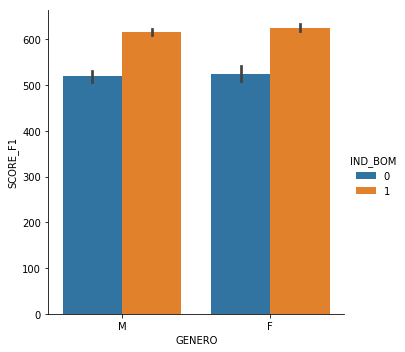

In [17]:
sns.catplot(data = df, x = 'GENERO', y = 'SCORE_F1', hue = 'IND_BOM', kind = 'bar');

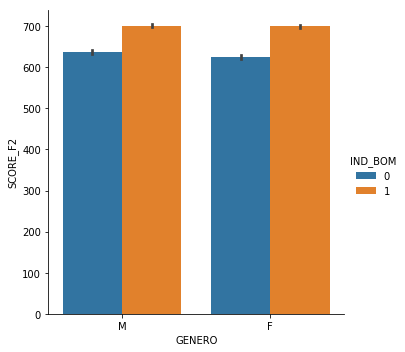

In [18]:
sns.catplot(data = df, x = 'GENERO', y = 'SCORE_F2', hue = 'IND_BOM', kind = 'bar');

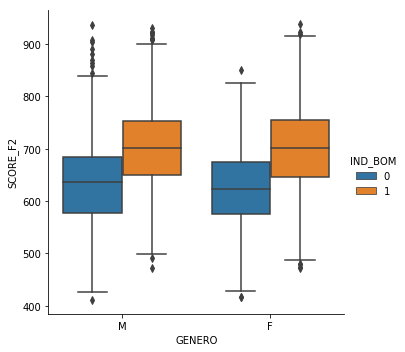

In [19]:
sns.catplot(data = df, x = 'GENERO', y = 'SCORE_F2', hue = 'IND_BOM', kind = 'box')

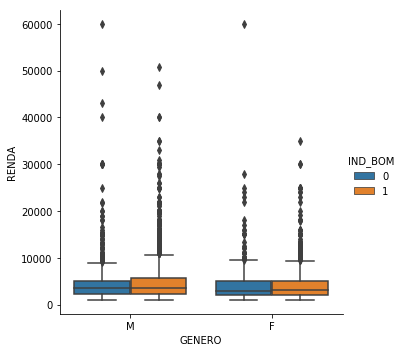

In [20]:
sns.catplot(data = df, x = 'GENERO', y = 'RENDA', hue = 'IND_BOM', kind = 'box')

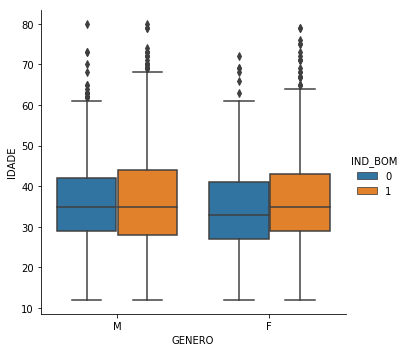

In [21]:
sns.catplot(data = df, x = 'GENERO', y = 'IDADE', hue = 'IND_BOM', kind = 'box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204BEB9F978>]],
      dtype=object)

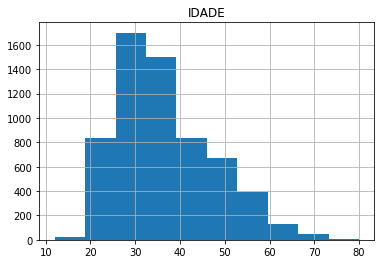

In [22]:
df.hist(column = 'IDADE', bins = 10)

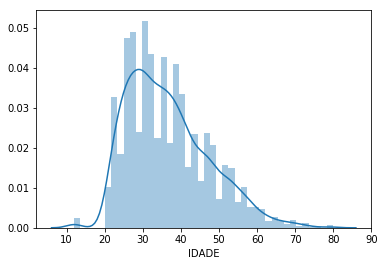

In [23]:
sns.distplot(df['IDADE'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204BECF47B8>]],
      dtype=object)

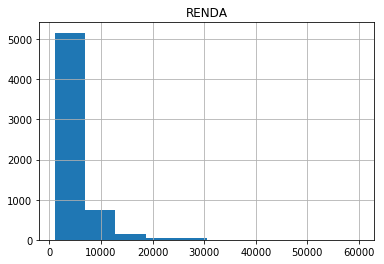

In [24]:
df.hist(column = 'RENDA', bins = 10)

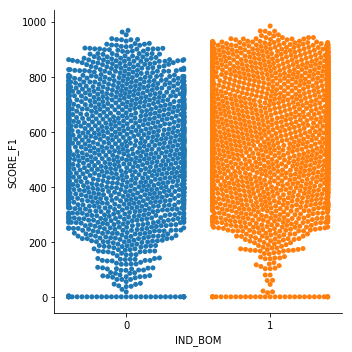

In [25]:
sns.catplot(x = 'IND_BOM', y = 'SCORE_F1', kind = 'swarm', data = df)

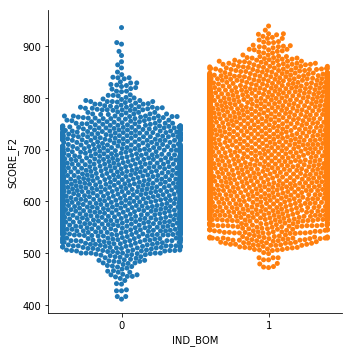

In [26]:
sns.catplot(x = 'IND_BOM', y = 'SCORE_F2', kind = 'swarm', data = df)

# Modelo

In [27]:
df.columns

Index(['ID', 'SAFRA', 'CEP', 'IDADE', 'GENERO', 'RENDA', 'SCORE_F1',
       'SCORE_F2', 'IND_BOM'],
      dtype='object')

In [28]:
df.drop(['ID'], axis = 1, inplace = True)

In [29]:
#df.drop(['SAFRA'], axis = 1, inplace = True)
df.drop(['CEP'], axis = 1, inplace = True)

In [30]:
df.head()

,SAFRA,IDADE,GENERO,RENDA,SCORE_F1,SCORE_F2,IND_BOM
0,201907,37,M,40000.0,528.0,719.0,1
1,201909,36,M,19500.0,454.0,717.0,1
2,201908,43,F,1200.0,756.0,827.0,1
3,201905,35,M,1280.0,2.0,607.0,0
4,201906,27,M,7058.0,517.0,738.0,0


In [31]:
df = pd.get_dummies(df, prefix=['GENERO'], columns=['GENERO'])

In [32]:
df.head()

,SAFRA,IDADE,RENDA,SCORE_F1,SCORE_F2,IND_BOM,GENERO_F,GENERO_M
0,201907,37,40000.0,528.0,719.0,1,0,1
1,201909,36,19500.0,454.0,717.0,1,0,1
2,201908,43,1200.0,756.0,827.0,1,1,0
3,201905,35,1280.0,2.0,607.0,0,0,1
4,201906,27,7058.0,517.0,738.0,0,0,1


In [33]:
df["GENERO_F"] = df["GENERO_F"].astype('int')
df["GENERO_M"] = df["GENERO_M"].astype('int')

In [34]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix  

In [35]:
x = df.drop('IND_BOM', axis = 1)
y = df['IND_BOM']

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalizado = scaler.fit_transform(x)

C:\Users\EdnaRB\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_normalizado, y, test_size=0.3)

In [38]:
x_train.shape,x_test.shape

((4309, 7), (1848, 7))

In [39]:
y_train.shape,y_test.shape

((4309,), (1848,))

In [40]:
arvore_risco_credito = DecisionTreeClassifier(criterion = 'gini')
arvore_risco_credito.fit(x_train,y_train)
arvore_risco_credito.feature_importances_

array([0.06195255, 0.13828889, 0.17170073, 0.2530359 , 0.34058354,
       0.01726043, 0.01717796])

In [41]:
resultado = arvore_risco_credito.predict(x_test)

In [42]:
resultado

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
confusion_matrix(y_test,resultado)

array([[229, 287],
       [354, 978]], dtype=int64)

In [45]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.39      0.44      0.42       516
           1       0.77      0.73      0.75      1332

   micro avg       0.65      0.65      0.65      1848
   macro avg       0.58      0.59      0.58      1848
weighted avg       0.67      0.65      0.66      1848

